<a href="https://colab.research.google.com/github/Rashida-Rangwala/Delhivery_Casestudy/blob/main/Delhivery_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**Need to explore the following -**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

**Column Profiling:**

1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique Id for a particular route schedule
4. route_type – Transportation type
5. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
6. Carting: Handling system consisting of small vehicles (carts)
7. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
8. source_center - Source ID of trip origin
9. source_name - Source Name of trip origin
10. destination_cente – Destination ID
11. destination_name – Destination Name
12. od_start_time – Trip start time
13. od_end_time – Trip end time
14. start_scan_to_end_scan – Time taken to deliver from source to destination
15. is_cutoff – Unknown field
16. cutoff_factor – Unknown field
17. cutoff_timestamp – Unknown field
18. actual_distance_to_destination – Distance in Kms between source and destination warehouse
19. actual_time – Actual time taken to complete the delivery (Cumulative)
20. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
21. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
22. factor – Unknown field
23. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
24. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
25. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
26. segment_factor – Unknown field

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 236MB/s]


In [ ]:
df = pd.read_csv("delhivery_data.csv")

df.head(20)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df.describe(include=["object"])

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [ ]:
df.describe(include=[np.number])

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
df[df['source_name'].isna()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:54:08,45.134384,62.0,45.0,47.7734,1.377778,34.0,23.0,23.6601,1.478261
144485,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:30:09,66.542266,86.0,71.0,71.9549,1.211268,23.0,25.0,24.1815,0.920000
144486,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:00:08,88.143957,116.0,114.0,112.6943,1.017544,30.0,43.0,40.7394,0.697674
144487,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 19:02:11,111.084417,173.0,123.0,134.1940,1.406504,57.0,45.0,46.9217,1.266667


In [ ]:
df[df['destination_name'].isna()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
110,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,...,2018-09-26 05:57:25,24.538214,58.0,33.0,30.8845,1.757576,58.0,33.0,30.8845,1.757576
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,...,2018-09-26 05:04:49.254901,34.657709,110.0,43.0,41.5361,2.558140,52.0,10.0,10.6517,5.200000
982,test,2018-10-01 20:56:18.155260,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND573103AAA,Arsikere_HsnRdDPP_D (Karnataka),IND577116AAA,NaN,2018-10-02 01:22:21.450243,...,2018-10-02 01:38:30,22.029639,21.0,16.0,22.9630,1.312500,21.0,16.0,22.9630,1.312500
983,test,2018-10-01 20:56:18.155260,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND573103AAA,Arsikere_HsnRdDPP_D (Karnataka),IND577116AAA,NaN,2018-10-02 01:22:21.450243,...,2018-10-02 01:23:30,35.528960,36.0,25.0,36.5050,1.440000,15.0,9.0,13.5420,1.666667
4882,training,2018-09-24 07:18:06.087341,thanos::sroute:2f43f11e-d3ba-4590-9355-82928e1...,FTL,trip-153777348608709328,IND202001AAB,Aligarh_KhirByps_I (Uttar Pradesh),IND282002AAD,NaN,2018-09-24 15:02:13.760270,...,2018-09-24 18:06:49,22.193687,40.0,26.0,28.9817,1.538462,40.0,26.0,28.9817,1.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144478,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND282002AAD,NaN,2018-10-03 09:06:06.690094,...,2018-10-03 15:42:11,89.773705,108.0,70.0,99.4096,1.542857,21.0,16.0,23.3595,1.312500
144479,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND282002AAD,NaN,2018-10-03 09:06:06.690094,...,2018-10-03 15:12:10,110.854079,138.0,94.0,124.6598,1.468085,30.0,24.0,25.2502,1.250000
144480,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND282002AAD,NaN,2018-10-03 09:06:06.690094,...,2018-10-03 12:26:08,132.514233,304.0,119.0,147.2295,2.554622,166.0,24.0,22.5697,6.916667
144481,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND282002AAD,NaN,2018-10-03 09:06:06.690094,...,2018-10-03 11:52:20,154.024566,337.0,130.0,177.2394,2.592308,33.0,27.0,24.9784,1.222222


**Handling Missing Values**

2 columns - Source name and destination name have some null values.
After checking those source center and destination center values, no names are available against them so dropping it for further analysis.

In [ ]:
df[df["destination_center"] == "IND282002AAD"]["destination_name"].isnull().sum()

151

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[df["destination_center"] == "IND282002AAD"]["destination_name"].isnull().sum()

0

In [ ]:
df.drop(columns=['is_cutoff', 'cutoff_factor',
       'cutoff_timestamp'], inplace= True)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'factor',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
       'segment_factor'],
      dtype='object')

**Merging Data**

Using groupby operation on trip_uuid, source_center and destination_center becuase for the same trip id alot of information is present.

In [ ]:
df_grouped_1 = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg({'trip_creation_time' : 'first', 'source_name':'first', 'destination_name':'first', 'route_type' : 'first', 'od_start_time': 'min', 'od_end_time': 'max', 'start_scan_to_end_scan' : 'first','segment_actual_time': 'sum', 'segment_osrm_time': 'sum' ,'segment_osrm_distance': 'sum', 'actual_distance_to_destination': 'max', 'osrm_distance':'max','actual_time': 'max','osrm_time':'max'})

In [ ]:
df_grouped_1.reset_index(inplace=True)

In [ ]:
df[df["trip_uuid"] == "trip-153671041653548748"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
124981,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,22.812439,43.0,39.0,55.2597,1.102564,43.0,39.0,55.2597,1.102564
124982,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,45.902553,69.0,35.0,49.4845,1.971429,25.0,52.0,73.8647,0.480769
124983,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,68.090371,146.0,51.0,72.5479,2.862745,76.0,16.0,23.0634,4.750000
124984,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,88.382207,181.0,66.0,93.9641,2.742424,35.0,15.0,21.4162,2.333333
124985,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,110.168313,205.0,82.0,117.2332,2.500000,23.0,16.0,23.2691,1.437500
124986,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,133.062129,234.0,99.0,141.1550,2.363636,28.0,16.0,23.9218,1.750000
124987,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,154.393443,256.0,116.0,164.9134,2.206897,22.0,16.0,23.7584,1.375000
124988,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,177.997213,286.0,134.0,190.8280,2.134328,29.0,18.0,25.9146,1.611111
124989,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,199.007702,318.0,153.0,216.2362,2.078431,32.0,18.0,25.4082,1.777778
124990,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,999.0,221.688428,360.0,174.0,243.0267,2.068966,41.0,36.0,46.2758,1.138889


In [ ]:
df_grouped_1.sort_values(by = ["trip_uuid","od_start_time"])

,trip_uuid,source_center,destination_center,trip_creation_time,source_name,destination_name,route_type,od_start_time,od_end_time,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,820.0,474.0,649.8528,440.973689,544.8027,830.0,394.0
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,728.0,534.0,670.6205,383.759164,446.5496,732.0,349.0
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,95.0,39.0,55.9899,48.542890,56.9116,96.0,42.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,46.0,26.0,28.1995,24.644021,28.1994,47.0,26.0
5,trip-153671043369099517,IND562132AAA,IND000000ACB,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,2700.0,1710.0,2227.5270,1689.964663,2090.8743,2736.0,1529.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,49.0,42.0,42.1431,33.627182,42.5213,51.0,41.0
26216,trip-153861115439069069,IND627657AAA,IND628613AAA,2018-10-03 23:59:14.390954,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),Carting,2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,32.0,30.0,25.7087,17.373209,25.7087,33.0,31.0
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,89.0,77.0,78.5869,33.673835,40.6080,90.0,48.0
26221,trip-153861118270144424,IND583201AAA,IND583119AAA,2018-10-03 23:59:42.701692,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),FTL,2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,41.0,25.0,28.0484,25.534793,28.0484,42.0,26.0


In [ ]:
df_grouped_1.columns

Index(['trip_uuid', 'source_center', 'destination_center',
       'trip_creation_time', 'source_name', 'destination_name', 'route_type',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
       'actual_distance_to_destination', 'osrm_distance', 'actual_time',
       'osrm_time'],
      dtype='object')

In [ ]:
df_grouped_1

,trip_uuid,source_center,destination_center,trip_creation_time,source_name,destination_name,route_type,od_start_time,od_end_time,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,728.0,534.0,670.6205,383.759164,446.5496,732.0,349.0
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,820.0,474.0,649.8528,440.973689,544.8027,830.0,394.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,46.0,26.0,28.1995,24.644021,28.1994,47.0,26.0
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,95.0,39.0,55.9899,48.542890,56.9116,96.0,42.0
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),FTL,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,608.0,231.0,317.7408,242.309306,281.2109,611.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,49.0,42.0,42.1431,33.627182,42.5213,51.0,41.0
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,89.0,77.0,78.5869,33.673835,40.6080,90.0,48.0
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),Carting,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,29.0,14.0,16.0184,12.661945,16.0185,30.0,14.0
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),FTL,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,233.0,42.0,52.5303,40.546740,52.5303,233.0,42.0


In [ ]:
df_grouped_2 = df_grouped_1.groupby('trip_uuid').agg({'trip_creation_time' : 'first', 'source_center':'last', 'destination_center':'first', 'source_name':'last', 'destination_name':'first', 'route_type' : 'first', 'od_start_time': 'min', 'od_end_time': 'max', 'start_scan_to_end_scan' : 'sum','segment_actual_time': 'sum', 'segment_osrm_distance': 'sum', 'actual_distance_to_destination': 'sum', 'segment_osrm_time': 'sum' ,  'actual_time': 'max','osrm_time':'sum', 'osrm_distance':'sum'})

In [ ]:
df_grouped_2.reset_index(inplace=True)

In [ ]:
df_grouped_2.head()

,trip_uuid,trip_creation_time,source_center,destination_center,source_name,destination_name,route_type,od_start_time,od_end_time,start_scan_to_end_scan,segment_actual_time,segment_osrm_distance,actual_distance_to_destination,segment_osrm_time,actual_time,osrm_time,osrm_distance
0,trip-153671041653548748,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1548.0,1320.4733,824.732854,1008.0,830.0,743.0,991.3523
1,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,141.0,84.1894,73.186911,65.0,96.0,68.0,85.1110
2,trip-153671043369099517,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3308.0,2545.2678,1932.273969,1941.0,2736.0,1741.0,2372.0852
3,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,19.8766,17.175274,16.0,59.0,15.0,19.6800
4,trip-153671052974046625,2018-09-12 00:02:09.740725,IND583201AAA,IND583201AAA,Hospet (Karnataka),Hospet (Karnataka),FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,340.0,146.7919,127.448500,115.0,147.0,117.0,146.7918


In [ ]:
df_grouped_2.describe()

,start_scan_to_end_scan,segment_actual_time,segment_osrm_distance,actual_distance_to_destination,segment_osrm_time,actual_time,osrm_time,osrm_distance
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,529.429025,353.059174,222.705466,164.291904,180.511598,277.922973,161.669575,204.637575
std,658.254936,556.365911,416.846279,305.677608,314.679279,486.137788,272.405903,370.951895
min,23.000000,9.000000,9.072900,9.002461,6.000000,9.000000,6.000000,9.072900
25%,149.000000,66.000000,32.578850,22.840056,30.000000,61.000000,29.000000,30.875600
50%,279.000000,147.000000,69.784200,48.376934,65.000000,110.000000,60.000000,65.575600
75%,632.000000,364.000000,216.560600,163.703311,184.000000,235.000000,168.000000,207.159550
max,7898.000000,6230.000000,3523.632400,2187.483994,2564.000000,4532.000000,2032.000000,2840.081000


In [ ]:
df_grouped_2.describe(include=["object"])

,trip_uuid,trip_creation_time,source_center,destination_center,source_name,destination_name,route_type,od_start_time,od_end_time
count,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,14787,14787,1073,1042,1073,1042,2,14787,14787
top,trip-153671041653548748,2018-09-12 00:00:16.535741,IND000000ACB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Carting,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744
freq,1,1,874,745,874,745,8906,1,1


**Finding out the count of null values**

In [ ]:
df_grouped_2.isnull().sum()

trip_uuid                         0
trip_creation_time                0
source_center                     0
destination_center                0
source_name                       0
destination_name                  0
route_type                        0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
segment_actual_time               0
segment_osrm_distance             0
actual_distance_to_destination    0
segment_osrm_time                 0
actual_time                       0
osrm_time                         0
osrm_distance                     0
dtype: int64

Now, the data looks good. For every trip id we have only one record from source to destination.
There are very few missing values in the dataframe for source name and destination name and the same information is already available in the center id's.

Let's start EDA of the data present in df_grouped_2 dataframe.

In [ ]:
df_grouped_2["trip_creation_time"] = pd.to_datetime(df_grouped_2["trip_creation_time"])

In [ ]:
df_grouped_2["trip_creation_day_name"] = df_grouped_2["trip_creation_time"].dt.day_name()
df_grouped_2["trip_creation_month"] = df_grouped_2["trip_creation_time"].dt.month
df_grouped_2["trip_creation_year"] = df_grouped_2["trip_creation_time"].dt.year
df_grouped_2["time24H"] = df_grouped_2["trip_creation_time"].dt.hour

In [ ]:
df_grouped_2["trip_creation_year"].value_counts()

2018    14787
Name: trip_creation_year, dtype: int64

In [ ]:
df_grouped_2["trip_creation_month"].value_counts()

9     13011
10     1776
Name: trip_creation_month, dtype: int64

In [ ]:
df_grouped_2["trip_creation_day_name"].value_counts()

Wednesday    2731
Saturday     2128
Thursday     2103
Friday       2057
Tuesday      2035
Monday       1980
Sunday       1753
Name: trip_creation_day_name, dtype: int64

In [ ]:
df_grouped_2["time24H"].value_counts()

22    1123
23    1107
20    1080
0      991
21     872
19     837
1      748
2      702
18     696
3      651
4      635
6      610
17     595
16     526
5      505
7      472
15     469
14     379
8      345
13     328
9      317
12     270
11     267
10     262
Name: time24H, dtype: int64

In [ ]:
df_grouped_2["source_name"][0]

'Bhopal_Trnsport_H (Madhya Pradesh)'

In [ ]:
df_grouped_2["source_state"] = df_grouped_2.source_name.str.split(" ")


In [ ]:
df_grouped_2["source_state"]

0        [Bhopal_Trnsport_H, (Madhya, Pradesh)]
1              [Tumkur_Veersagr_I, (Karnataka)]
2           [Bangalore_Nelmngla_H, (Karnataka)]
3                  [Mumbai, Hub, (Maharashtra)]
4                         [Hospet, (Karnataka)]
                          ...                  
14782     [Chandigarh_Raiprkln_C, (Chandigarh)]
14783           [FBD_Balabhgarh_DPC, (Haryana)]
14784    [Kanpur_Central_H_6, (Uttar, Pradesh)]
14785          [Eral_Busstand_D, (Tamil, Nadu)]
14786                     [Hospet, (Karnataka)]
Name: source_state, Length: 14787, dtype: object

In [ ]:
df_grouped_2.head()

,trip_uuid,trip_creation_time,source_center,destination_center,source_name,destination_name,route_type,od_start_time,od_end_time,start_scan_to_end_scan,...,actual_distance_to_destination,segment_osrm_time,actual_time,osrm_time,osrm_distance,trip_creation_day_name,trip_creation_month,trip_creation_year,time24H,source_state
0,trip-153671041653548748,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,824.732854,1008.0,830.0,743.0,991.3523,Wednesday,9,2018,0,"[Bhopal_Trnsport_H, (Madhya, Pradesh)]"
1,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,73.186911,65.0,96.0,68.0,85.1110,Wednesday,9,2018,0,"[Tumkur_Veersagr_I, (Karnataka)]"
2,trip-153671043369099517,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,1932.273969,1941.0,2736.0,1741.0,2372.0852,Wednesday,9,2018,0,"[Bangalore_Nelmngla_H, (Karnataka)]"
3,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,17.175274,16.0,59.0,15.0,19.6800,Wednesday,9,2018,0,"[Mumbai, Hub, (Maharashtra)]"
4,trip-153671052974046625,2018-09-12 00:02:09.740725,IND583201AAA,IND583201AAA,Hospet (Karnataka),Hospet (Karnataka),FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,127.448500,115.0,147.0,117.0,146.7918,Wednesday,9,2018,0,"[Hospet, (Karnataka)]"


In [ ]:
df_grouped_2["destination_city"] = df_grouped_2["destination_name"].apply(lambda x: x.split("_")[0])

In [ ]:
df_grouped_2["destination_city"].value_counts()

Bengaluru    1075
Mumbai        848
Gurgaon       801
Bhiwandi      566
Bangalore     558
             ... 
Osmanabad       1
Kandukur        1
Palamaner       1
Bhatkal         1
Kapadvanj       1
Name: destination_city, Length: 868, dtype: int64

In [ ]:
df_grouped_2["source_city"] = df_grouped_2["source_name"].apply(lambda x: x.split("_")[0])

In [ ]:
df_grouped_2["source_city"].value_counts()

Bengaluru       1019
Gurgaon          950
Bhiwandi         776
Bangalore        683
Mumbai           567
                ... 
Thiruvadanai       1
Vizag              1
Jowai              1
Jiyanpur           1
Anandnagar         1
Name: source_city, Length: 882, dtype: int64

In [ ]:
df_grouped_2["od_end_time"][0]

'2018-09-13 13:40:23.123744'

In [ ]:
df_grouped_2["od_end_time"] = pd.to_datetime(df_grouped_2["od_end_time"])
df_grouped_2["od_start_time"] = pd.to_datetime(df_grouped_2["od_start_time"])

In [ ]:
df_grouped_2["total_trip_time"] = (df_grouped_2["od_end_time"] - df_grouped_2["od_start_time"]).dt.total_seconds() / 60

In [ ]:
df_grouped_2["total_trip_time"]

0        2260.109800
1         181.611874
2        3934.362520
3         100.494935
4         718.349042
            ...     
14782     405.485842
14783      60.590521
14784     422.119867
14785     348.512862
14786     354.407571
Name: total_trip_time, Length: 14787, dtype: float64

In [ ]:
df_grouped_2["start_scan_to_end_scan"][0]

2259.0

**Comparing Start scan to end scan time with total trip time (od start to od end time)**

<Axes: xlabel='total_trip_time', ylabel='Count'>

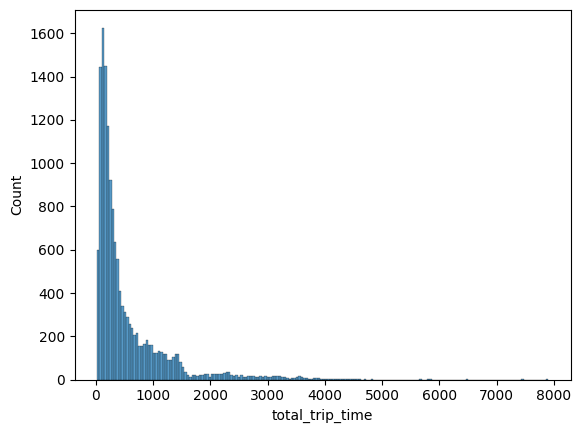

In [ ]:
import seaborn as sns
sns.histplot(df_grouped_2, x = "total_trip_time")

<Axes: xlabel='start_scan_to_end_scan', ylabel='Count'>

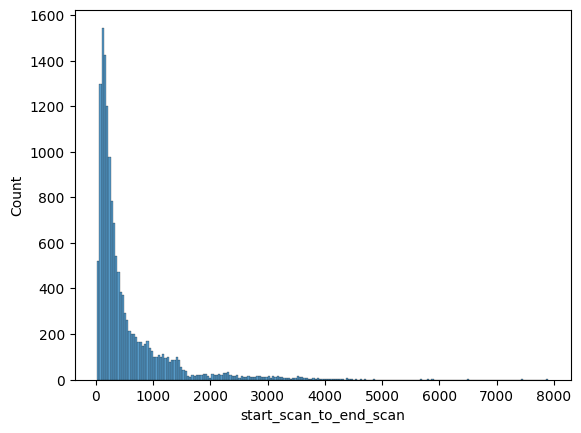

In [ ]:
sns.histplot(df_grouped_2, x = "start_scan_to_end_scan")

<Axes: xlabel='start_scan_to_end_scan', ylabel='total_trip_time'>

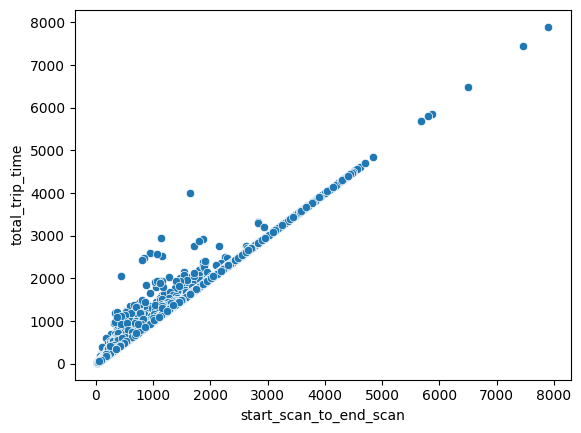

In [ ]:
sns.scatterplot(data=df_grouped_2, x="start_scan_to_end_scan", y="total_trip_time")

**Hypothesis Testing on start_scan_to_end_scan and total_trip_time**

Ho: The start to end scan time is same as total trip time

Ha: The start to end scan time is less than total trip time (actual)

In [ ]:
from scipy.stats import ttest_ind,  ttest_1samp

t_stat, p_val = ttest_ind(df_grouped_2["start_scan_to_end_scan"], df_grouped_2["total_trip_time"], alternative = "less")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

-2.1662439760977112 0.0151502553540956
Reject Null Hypothesis


By looking at the above result we can say that start to end scan time is less than total trip time so rejecting NULL Hypothesis

**Comparing Actual Time and Segment actual time aggregated**

Ho: The actual time and segment actual time for delivery are same

Ha: Actual time to reach destination is less than segment actual time

In [ ]:
from scipy.stats import ttest_ind,  ttest_1samp

t_stat, p_val = ttest_ind(df_grouped_2["actual_time"], df_grouped_2["segment_actual_time"], alternative = "less")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")


-12.366405130681308 2.4247705620790907e-35
Reject Null Hypothesis


By looking at the above result we can say that actual time is less than segment actual time so rejecting NULL Hypothesis

In [ ]:
df_grouped_2.columns

Index(['trip_uuid', 'trip_creation_time', 'source_center',
       'destination_center', 'source_name', 'destination_name', 'route_type',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'segment_actual_time', 'segment_osrm_distance',
       'actual_distance_to_destination', 'segment_osrm_time', 'actual_time',
       'osrm_time', 'osrm_distance', 'trip_creation_day_name',
       'trip_creation_month', 'trip_creation_year', 'time24H', 'source_state',
       'destination_name_1', 'total_trip_time'],
      dtype='object')

In [ ]:
df_grouped_2["osrm_distance"] = df_grouped_2["osrm_distance"] * 1000

**Comparing Actual Time and Segment actual time aggregated**

Ho: The osrm distance and segment osrm distance aggregated for delivery are same

Ha: Osrm distance to reach destination is greater than segment osrm distance

In [ ]:
#osrm distance aggregated value and segment osrm distance aggregated value
from scipy.stats import ttest_ind,  ttest_1samp

t_stat, p_val = ttest_ind(df_grouped_2["osrm_distance"], df_grouped_2["segment_osrm_distance"], alternative = "greater")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")


67.00923374142972 0.0
Reject Null Hypothesis


**Comparing Osrm Time and Segment osrm time aggregated**

Ho: The osrm time and segment osrm time aggregated for delivery are same

Ha: Osrm time to reach destination is less than segment osrm time

Looking at the above test we can say that the osrm distance is greater than the segment osrm distance

In [ ]:
df_grouped_2["osrm_time"] = df_grouped_2["osrm_time"] * 60

In [ ]:
from scipy.stats import ttest_ind,  ttest_1samp

t_stat, p_val = ttest_ind(df_grouped_2["osrm_time"], df_grouped_2["segment_osrm_time"], alternative = "less")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")


70.81306013847565 1.0
Fail to Reject Null Hypothesis


By looking at the above result we can say that osrm time is less than segment osrm time so rejecting NULL Hypothesis

**Visual Analysis on Source center, destination center, trip creation day and month**

<Axes: >

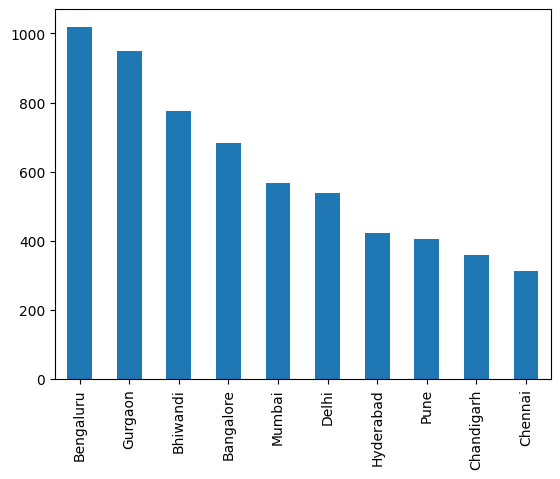

In [ ]:
top_10_source_city = (df_grouped_2['source_city'].value_counts()).iloc[:10]
top_10_source_city.plot(kind='bar')

<Axes: >

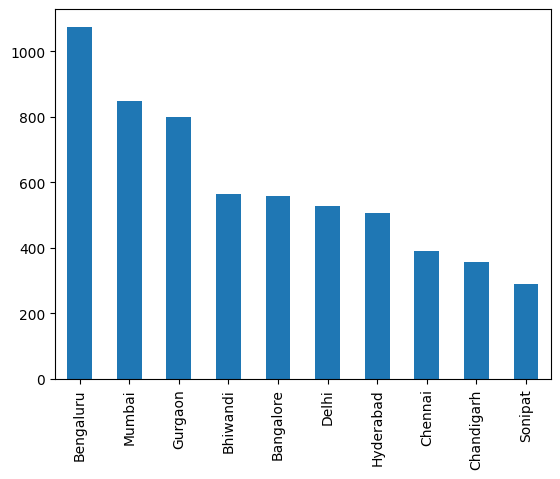

In [ ]:
top_10_destination_city = (df_grouped_2['destination_city'].value_counts()).iloc[:10]
top_10_destination_city.plot(kind='bar')

<Axes: xlabel='source_center', ylabel='count'>

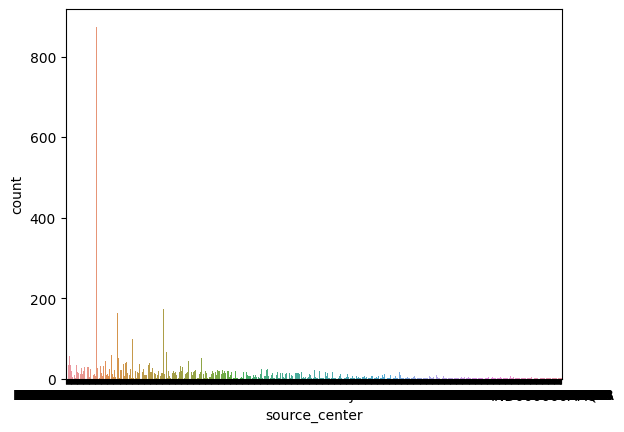

In [ ]:
sns.countplot(df_grouped_2, x = "source_center")

<Axes: xlabel='destination_center', ylabel='Count'>

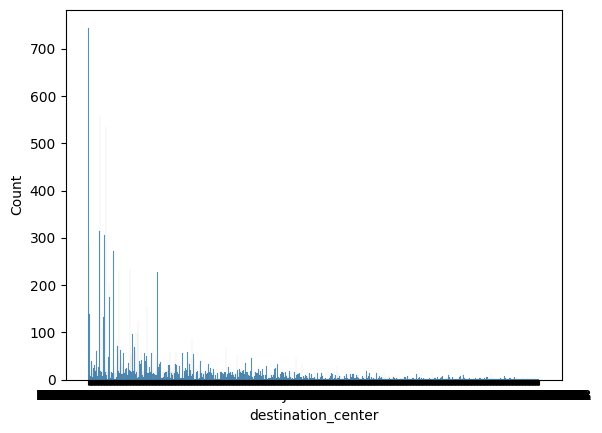

In [ ]:
sns.histplot(df_grouped_2, x = "destination_center")

<Axes: xlabel='trip_creation_month', ylabel='Density'>

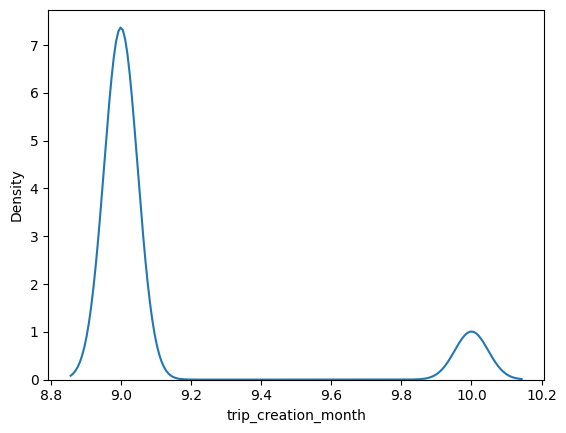

In [ ]:
sns.kdeplot(data = df_grouped_2, x = "trip_creation_month")

<Axes: xlabel='trip_creation_day_name', ylabel='count'>

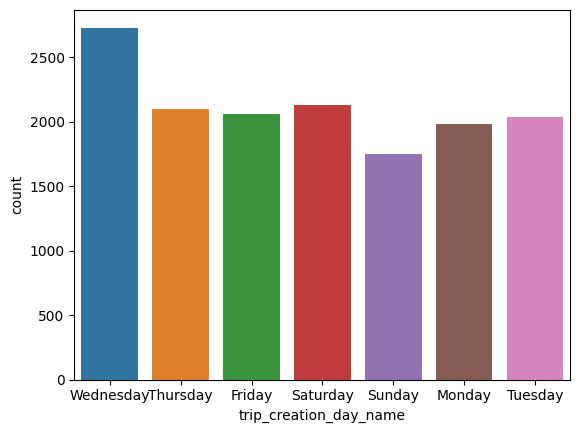

In [ ]:
sns.countplot(data=df_grouped_2, x = "trip_creation_day_name")

**Appling Label Encoding on route type column**

<Axes: xlabel='route_type', ylabel='count'>

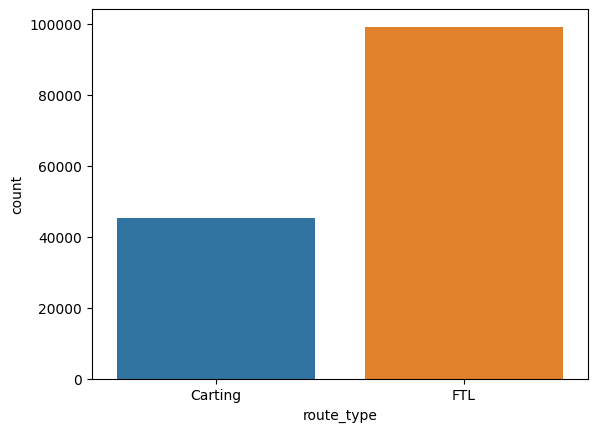

In [ ]:
sns.countplot(data = df, x = "route_type")

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_grouped_2["route_type"] = label_encoder.fit_transform(df_grouped_2["route_type"])

<Axes: xlabel='route_type', ylabel='count'>

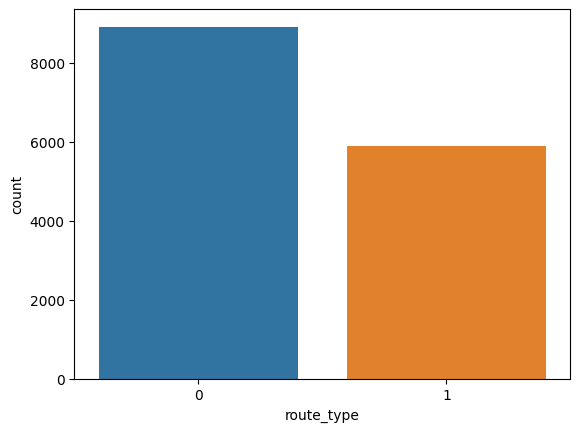

In [ ]:
sns.countplot(data = df_grouped_2, x = "route_type") # route_type = 0 stands for FTL and route_type = 1 stands for Carting

# Correlation between all the numerical/continous columns

In [ ]:
df_grouped_2.head()

,trip_uuid,trip_creation_time,source_center,destination_center,source_name,destination_name,route_type,od_start_time,od_end_time,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,trip_creation_day_name,trip_creation_month,trip_creation_year,time24H,source_state,destination_name_1,total_trip_time
0,trip-153671041653548748,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),1,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,830.0,44580.0,991352.3,Wednesday,9,2018,0,"[Bhopal_Trnsport_H, (Madhya, Pradesh)]",Gurgaon,2260.109800
1,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),0,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,96.0,4080.0,85111.0,Wednesday,9,2018,0,"[Tumkur_Veersagr_I, (Karnataka)]",Chikblapur,181.611874
2,trip-153671043369099517,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),1,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,2736.0,104460.0,2372085.2,Wednesday,9,2018,0,"[Bangalore_Nelmngla_H, (Karnataka)]",Chandigarh,3934.362520
3,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),0,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,59.0,900.0,19680.0,Wednesday,9,2018,0,"[Mumbai, Hub, (Maharashtra)]",Mumbai,100.494935
4,trip-153671052974046625,2018-09-12 00:02:09.740725,IND583201AAA,IND583201AAA,Hospet (Karnataka),Hospet (Karnataka),1,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,147.0,7020.0,146791.8,Wednesday,9,2018,0,"[Hospet, (Karnataka)]",Hospet (Karnataka),718.349042


<ipython-input-79-29eb2c0c23c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_grouped_2.corr(), cmap="YlGnBu", annot=True)


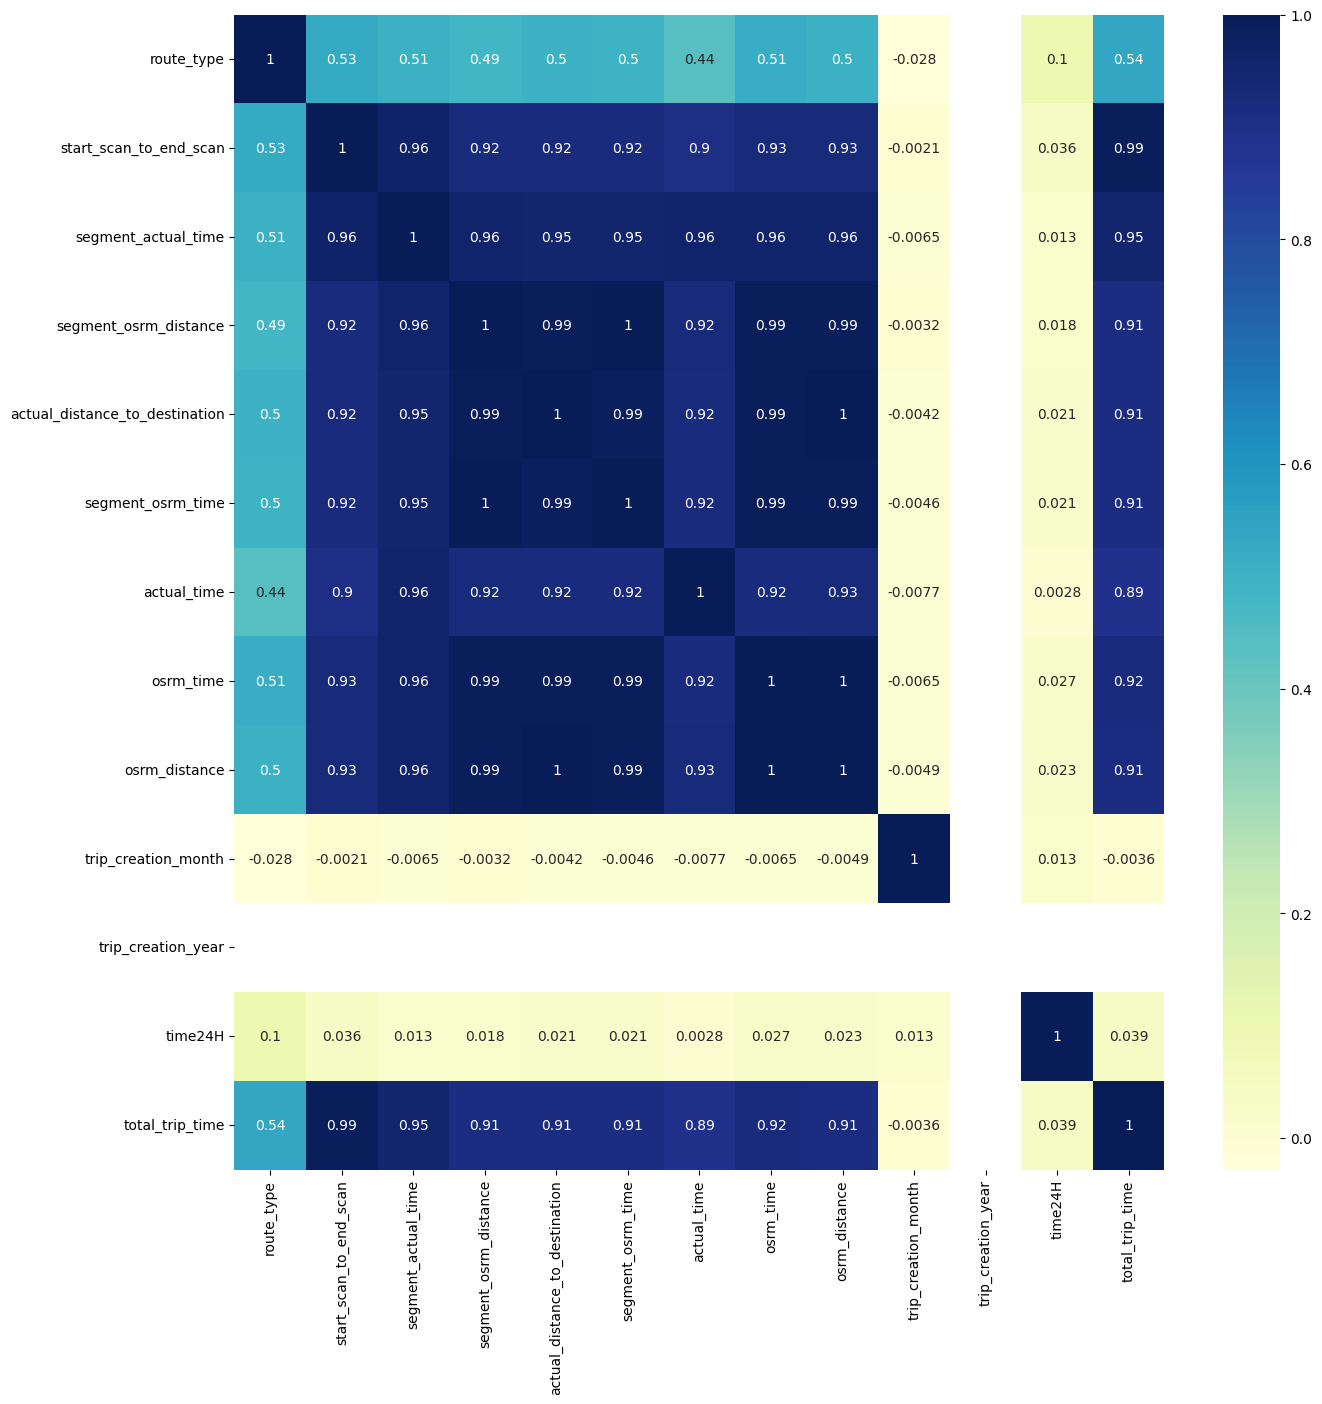

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
dataplot = sns.heatmap(df_grouped_2.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df_grouped_2["source_center"].value_counts()

IND000000ACB    874
IND421302AAG    776
IND562132AAA    681
IND560099AAB    416
IND560300AAA    323
               ... 
IND815301AAA      1
IND175001AAA      1
IND284403AAA      1
IND517325AAA      1
IND273155AAA      1
Name: source_center, Length: 1073, dtype: int64

In [ ]:
df_grouped_2["source_name"].value_counts()

Gurgaon_Bilaspur_HB (Haryana)            874
Bhiwandi_Mankoli_HB (Maharashtra)        776
Bangalore_Nelmngla_H (Karnataka)         681
Bengaluru_Bomsndra_HB (Karnataka)        416
Bengaluru_KGAirprt_HB (Karnataka)        323
                                        ... 
Giridih_Shivalya_D (Jharkhand)             1
Mandi_PlaceCol_D (Himachal Pradesh)        1
Lalitpur_RjghatRd_D (Uttar Pradesh)        1
Madnapalle_PngnrRd_D (Andhra Pradesh)      1
Anandnagar_LohiaDPP_D (Uttar Pradesh)      1
Name: source_name, Length: 1073, dtype: int64

In [ ]:
df_grouped_2["destination_center"].value_counts()

IND000000ACB    745
IND562132AAA    558
IND421302AAG    535
IND560099AAB    314
IND501359AAE    305
               ... 
IND517408AAA      1
IND581320AAA      1
IND431127AAA      1
IND209625AAA      1
IND302033AAB      1
Name: destination_center, Length: 1042, dtype: int64

In [ ]:
df_grouped_2["destination_name"].value_counts()

Gurgaon_Bilaspur_HB (Haryana)            745
Bangalore_Nelmngla_H (Karnataka)         558
Bhiwandi_Mankoli_HB (Maharashtra)        535
Bengaluru_Bomsndra_HB (Karnataka)        314
Hyderabad_Shamshbd_H (Telangana)         305
                                        ... 
Palamaner_Lakshmi_D (Andhra Pradesh)       1
Bhatkal_KmkshBul_D (Karnataka)             1
Georai_Bazarrd_D (Maharashtra)             1
Farrukhbad_Pnchlght_D (Uttar Pradesh)      1
Jaipur_Central_D_1 (Rajasthan)             1
Name: destination_name, Length: 1042, dtype: int64

The maximum packages are sourced from Gurgoan, Bhiwindi, Banglore and similary the have maximum package delivery centers also at these locations only.

**Conclusions -**

1. The maximum packages are sourced from Haryana state or Karnataka state, these states are people with most active online shopping trend.

2. The time taken by the parcels to reach the destination is mostly more than the actual time because the parcels are re routed to a lot of checkpoints.

**Recommendations -**

1. The maximum traffic is either in the South or the North zones of the country. Evidently people living in these areas tend to shop more and therefore Delhivery needs to provide very quick and efficient services in these regions.

2. Some warehouses should also be made in center states like MP, Gujarat, etc. as these offer less distance and traffic then the crowded states of India. Delhivery can expect quick services and transfers in these regions.

3. Sometimes it is obeserved that the parcel is taking lot longer than expected because of multiple checkpoints wait time.

4. More preferred routing is FTL because it is quick and affordable because of bulk tranfer of the parcels.